<a href="https://colab.research.google.com/github/KimDongHyun0907/Sesac_openAI/blob/main/%EC%86%90%EA%B8%80%EC%94%A8%EC%9D%B8%EC%8B%9D_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

[5 0 4 1 9 2 1 3 1 4]


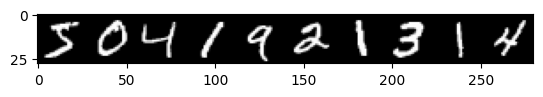

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
img = np.hstack(x_train[:10])
plt.imshow(img, cmap='gray')
print(y_train)

In [ ]:
len(y_train), len(y_test), np.unique(y_train, return_counts=True)

(60000,
 10000,
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])))

In [ ]:
# 28행, 28열의 흑백이미지 60000장
np.shape(x_train), np.shape(x_test)

((60000, 28, 28), (10000, 28, 28))

In [ ]:
## x, y 데이터 훈련, 테스트로 나누어진 데이터를 array로 받음.
## 사진데이터를 로드. 사이즈를 통일. array로 하고 레이블 변환하는 작업 X
## 지도학습, 사진을 넣으면 0,1,2,3,4,5,6,7,8,9의 10개중 어떤 카테고리인가를 맞추는 다항분류 문제
## 이 다항분류 문제는 무조건 원핫인코딩되어 있거나 아니면 모델에서 원핫인코딩시켜야 함.
# 이 자료에서는 원핫인코딩은 0은 [1,0,0,0,0,0,0,0,0,0] 9는 [0,0,0,0,0,0,0,0,0,1]

In [ ]:
# 샘플
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(3, 3)),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(2, activation='softmax')  # softmax는 다항분류 계산식 (활성화함수)
])

model.weights

[<tf.Variable 'dense_6/kernel:0' shape=(9, 5) dtype=float32, numpy=
 array([[-0.3694378 , -0.6328499 ,  0.28326982, -0.43675143, -0.1864106 ],
        [ 0.27198184,  0.55372083, -0.09563261, -0.36682126,  0.18939471],
        [-0.64260465,  0.37235904,  0.22500098, -0.13576353,  0.48901212],
        [ 0.37571156, -0.03026158,  0.13679707, -0.05332088,  0.3996346 ],
        [ 0.35639238,  0.37094402, -0.12008619, -0.30062377,  0.49636102],
        [-0.32425982, -0.08391649, -0.41983736,  0.46105134, -0.6163477 ],
        [ 0.10756129,  0.15464222,  0.33233923,  0.27899927,  0.3461871 ],
        [ 0.47771   , -0.51365095,  0.42537165, -0.63545406,  0.01279604],
        [-0.39513522,  0.5567404 ,  0.5662954 ,  0.63392055,  0.52344763]],
       dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_7/kernel:0' shape=(5, 2) dtype=float32, numpy=
 array([[-0.09871674,  0.16925764],
        [-0.01299983

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),  # w(100)+b(1) 기본 101개
  # dense는 바로위의 레이어에서 활성화함수에 의해 계산된 output. 다음레이어로 들어가는 input x값.
  # x값은 100개

  tf.keras.layers.Dropout(0.2),
  # 과적합없애기 w값을 20%정도 0으로 변경

  tf.keras.layers.Dense(10, activation='softmax')  # softmax는 다항분류 계산식 (활성화함수)
])

# softmax는 categorical_crossentropy
# y입력값이 원핫인코딩 안되어 있으면 sparse_categorical_crossentropy라고 지정하면
# 알아서 원핫인코딩함.

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_train, y_train, epochs=50,
          validation_data=(x_train, y_train), batch_size=100)

Epoch 1/50
600/600 [==============================] - 5s 8ms/step - loss: 0.0928 - accuracy: 0.9723 - val_loss: 0.0569 - val_accuracy: 0.9839
Epoch 2/50
600/600 [==============================] - 4s 6ms/step - loss: 0.0847 - accuracy: 0.9745 - val_loss: 0.0498 - val_accuracy: 0.9862
Epoch 3/50
600/600 [==============================] - 5s 8ms/step - loss: 0.0764 - accuracy: 0.9764 - val_loss: 0.0431 - val_accuracy: 0.9878
Epoch 4/50
600/600 [==============================] - 4s 7ms/step - loss: 0.0707 - accuracy: 0.9783 - val_loss: 0.0380 - val_accuracy: 0.9894
Epoch 5/50
600/600 [==============================] - 4s 6ms/step - loss: 0.0645 - accuracy: 0.9798 - val_loss: 0.0345 - val_accuracy: 0.9900
Epoch 6/50
600/600 [==============================] - 5s 8ms/step - loss: 0.0603 - accuracy: 0.9808 - val_loss: 0.0314 - val_accuracy: 0.9913
Epoch 7/50
600/600 [==============================] - 4s 7ms/step - loss: 0.0540 - accuracy: 0.9829 - val_loss: 0.0267 - val_accuracy: 0.9927
Epoch 

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model.save_weights('mnist.h5')

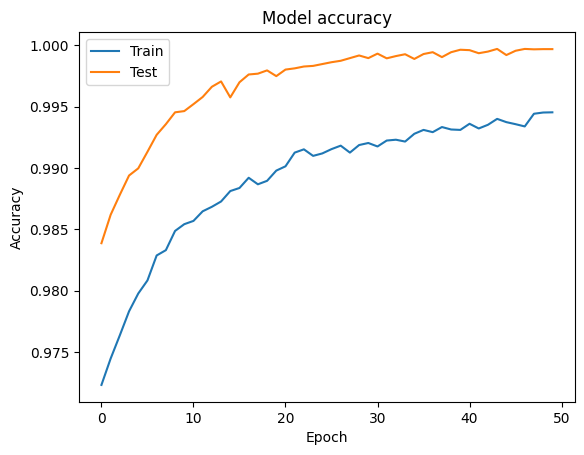

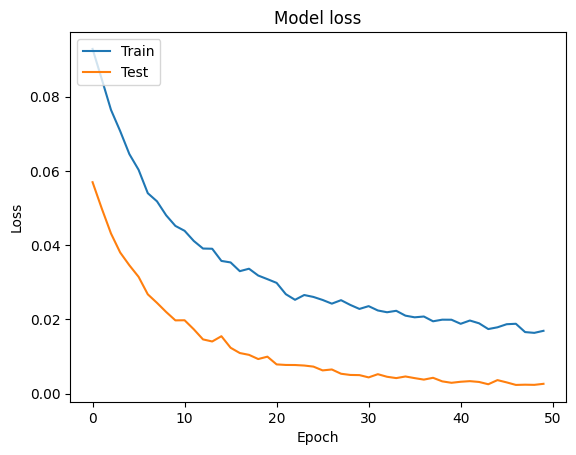

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# 손글씨 0~9까지의 카데고리를 분류하는 비전 모델
# 학습시에 28*28의 검정색 배경, 흑백을 학습함
# 원핫인코딩하지 않고 y값을 학습해서 모델에서 원핫인코딩함

In [ ]:
# 모델 불러오기
import tensorflow as tf
model = tf.keras.models.load_model('mnist.h5')

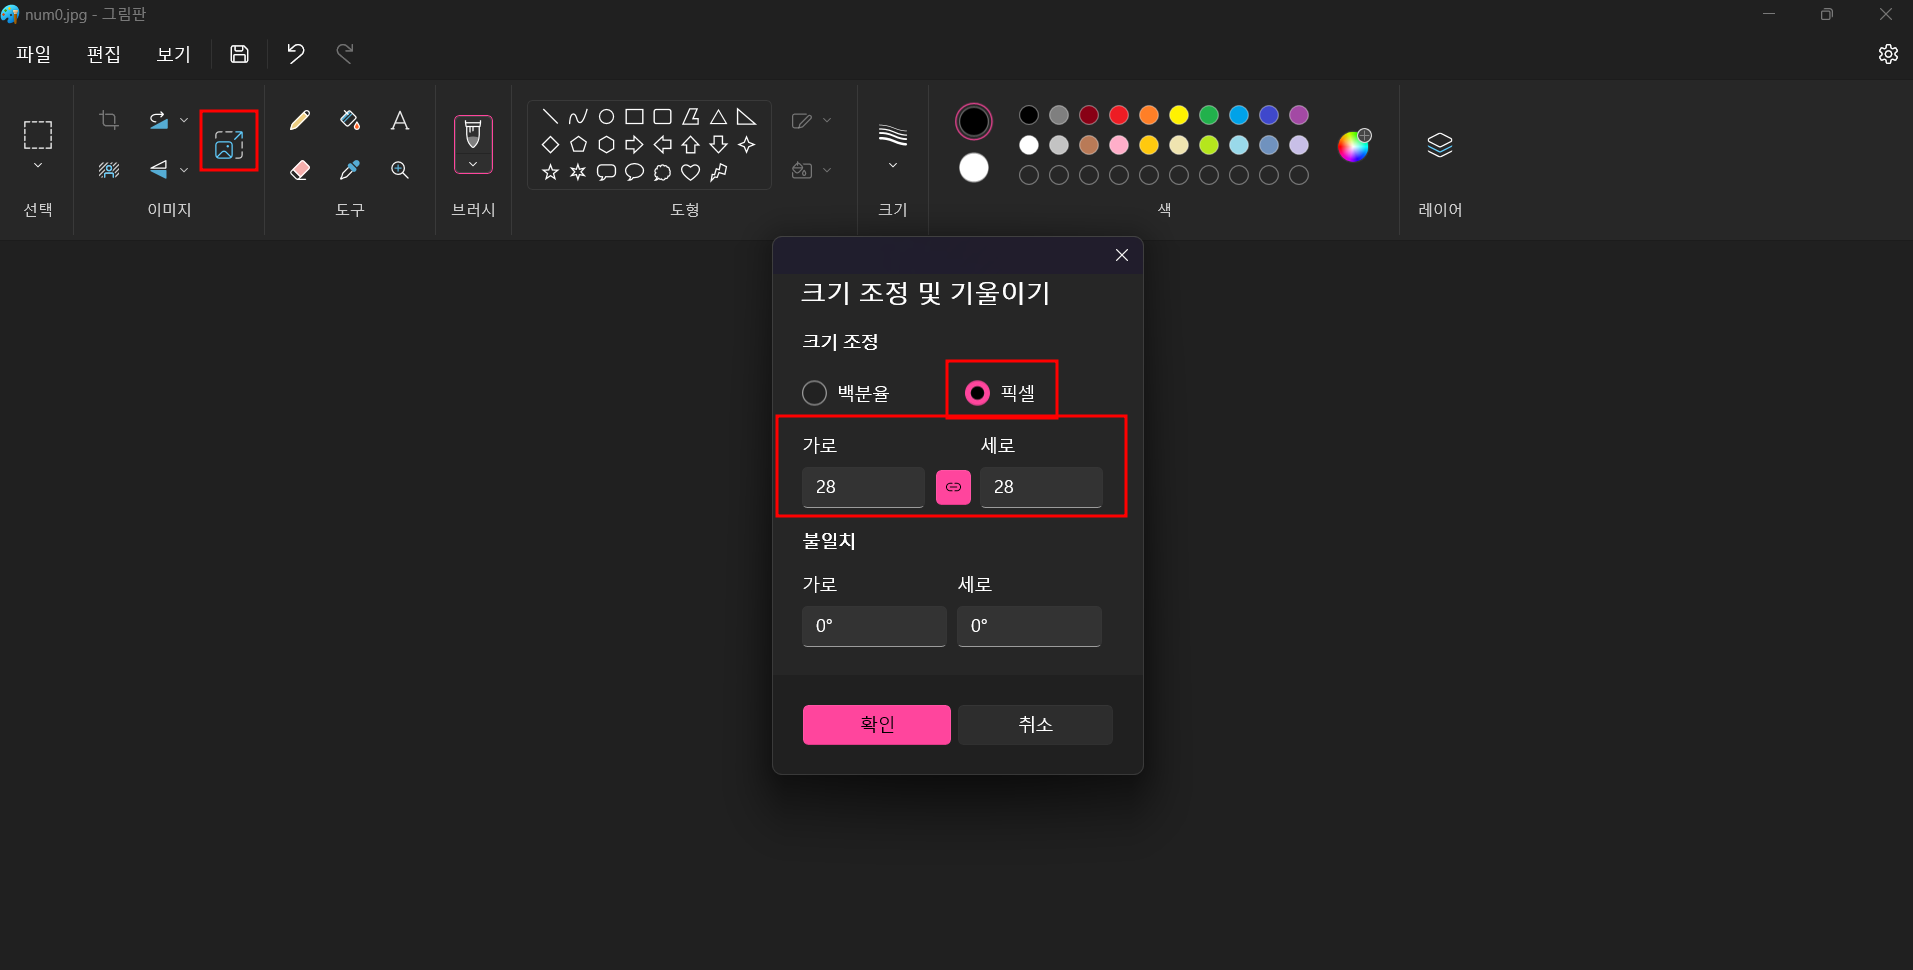

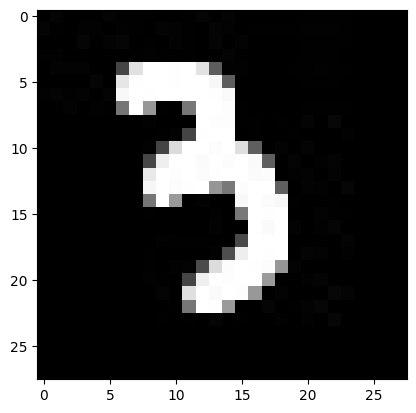

In [ ]:
# 이미지 준비
from PIL import Image
img = Image.open('num3.jpg').resize((28,28)).convert('L')

img = (255-np.array(img))/255.0
plt.imshow(img, cmap='gray')

newimg = np.reshape(img, (1, 28, 28))  # 학습할 때의 shape이 60000, 28, 28 의 3차원이기 때문


In [ ]:
newimg = np.reshape(img, (1, 28, 28))  # 학습할 때의 shape이 60000, 28, 28 의 3차원이기 때문

In [ ]:
# y값을 원핫인코딩하지 않고 모델작업에서 loss에서
# loss='sparse_categorical_crossentropy' 하면 tf.nn.softmax해야함.

predictions = model(newimg)
result = tf.nn.softmax(predictions)
np.argmax(result)  # 가장 큰 위치값 구하기

3

In [ ]:
# 만약 레이블이 있다면

class_num = ['숫자0', '숫자1', '숫자2','숫자3','숫자4','숫자5','숫자6','숫자7','숫자8','숫자9']
class_num[np.argmax(result)]

'숫자3'